# Google Play Store 
## complete Analysis for biginners to Advance EDA

# write about datasets form kaggle website 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Data loading and Exploring | Cleaning
* let's load the csv file

In [2]:
df=pd.read_csv('googleplaystore.csv')

* let's have a look on top 5 rows of the data

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


* important things to know

In [4]:
# set option to be maximum for rows and columns 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
# hide all warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
print(f"The number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The number of Rows are 10840, and columns are 13.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [8]:
df.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


# how to size a numeric collumns?

In [9]:
df['Size'].value_counts()
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

# Observations
1. "varies with device"
2. M
3. K

In [10]:
df['Size'].isnull().sum()

0

* no missing values in size, we are good to go

varify the number of values and 3 different kinds of values

In [11]:
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8829

find the values having k in them

In [12]:
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [13]:
# find the value having varies with device in them
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [14]:
len(df)

10840

In [15]:
8829+316+1695

10840

In [16]:
# convert the whole size columns into bytes
#let's define a function
def convert_size(size):
    if isinstance(size,str):
        if 'k' in size:
            return float(size.replace('k', ""))*1024
        elif 'M' in size:
            return float(size.replace('M',""))*1024*1024
        elif 'Varies with device' in size:
            return np.nan
    return size
        

In [17]:
# let's apply this function
df['Size']=df['Size'].apply(convert_size)

In [18]:
df['Size']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

In [19]:
# rename the columns
df.rename(columns={'Size':"Size_in_bytes"},inplace=True)

apply lamda function to create a columns

In [20]:
df['Size_in_Mb']=df['Size_in_bytes'].apply(lambda x: x/1024*1024)

In [21]:
df['Size_in_kb']=df['Size_in_bytes'].apply(lambda x: x/1024*1024)

In [22]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19922944.0,19922944.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14680064.0,14680064.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,9122611.2,9122611.2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,26214400.0,26214400.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2936012.8,2936012.8


# let's take care of install columns

In [23]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [24]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [25]:
df['Installs'].isnull().sum()

0

# Install Columns:
 
1. Remove + sign
2. Remove ,
3. convert the columns into an integers

In [26]:
# lamda ka elava ya code behi hum run kar ka replace kar sakta haen
#df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

In [27]:
df['Installs']=df['Installs'].apply(lambda x: x.replace('+',"")if '+' in str(x) else x)

In [28]:
df['Installs'].value_counts()

Installs
1,000,000        1579
10,000,000       1252
100,000          1169
10,000           1054
1,000             907
5,000,000         752
100               719
500,000           539
50,000            479
5,000             477
100,000,000       409
10                386
500               330
50,000,000        289
50                205
5                  82
500,000,000        72
1                  67
1,000,000,000      58
0                  15
Name: count, dtype: int64

In [29]:
df['Installs']=df['Installs'].apply(lambda x: x.replace(',',"")if '+' in str(x) else x)

In [30]:
# es code sa error a raha hae # how to change the type of installs
#df['Installs']=df['Installs'].apply(lambda x: int(x))

In [31]:
df.describe()

,Rating,Reviews,Size_in_bytes,Size_in_Mb,Size_in_kb
count,9366.000000,1.084000e+04,9.145000e+03,9.145000e+03,9.145000e+03
mean,4.191757,4.441529e+05,2.256133e+07,2.256133e+07,2.256133e+07
std,0.515219,2.927761e+06,2.368637e+07,2.368637e+07,2.368637e+07
min,1.000000,0.000000e+00,8.704000e+03,8.704000e+03,8.704000e+03
25%,4.000000,3.800000e+01,5.138022e+06,5.138022e+06,5.138022e+06
50%,4.300000,2.094000e+03,1.363149e+07,1.363149e+07,1.363149e+07
75%,4.500000,5.477550e+04,3.145728e+07,3.145728e+07,3.145728e+07
max,5.000000,7.815831e+07,1.048576e+08,1.048576e+08,1.048576e+08


In [32]:
df['Installs'].value_counts()

Installs
1,000,000        1579
10,000,000       1252
100,000          1169
10,000           1054
1,000             907
5,000,000         752
100               719
500,000           539
50,000            479
5,000             477
100,000,000       409
10                386
500               330
50,000,000        289
50                205
5                  82
500,000,000        72
1                  67
1,000,000,000      58
0                  15
Name: count, dtype: int64

# Price columns

In [33]:
df['Price'].value_counts()

Price
0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

In [34]:
# let's see how many values have $ sign
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

800

In [35]:
# counts the number of values in the 'Price' columns which contains 0 but does not contain $ sign
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\&'))].value_counts().sum()

10223

In [36]:
df['Price']=df['Price'].apply(lambda x: x.replace('$',"")if '$' in str(x) else x)

In [37]:
df['Price'].value_counts()

Price
0         10040
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
3.49          7
7.99          7
5.49          6
19.99         6
11.99         5
6.49          5
12.99         5
8.99          5
10.00         3
16.99         3
1.00          3
2.00          3
13.99         2
8.49          2
17.99         2
1.70          2
3.95          2
79.99         2
7.49          2
9.00          2
10.99         2
39.99         2
33.99         2
1.96          1
19.40         1
4.80          1
3.28          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
2.59          1
3.90          1
154.99        1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
1.20          1
1.26          1
30.99         1
3.

In [38]:
# now we can convert this into a numeric value
df['Price']=df['Price'].apply(lambda x: float(x))

In [39]:
df.describe()

,Rating,Reviews,Size_in_bytes,Price,Size_in_Mb,Size_in_kb
count,9366.000000,1.084000e+04,9.145000e+03,10840.000000,9.145000e+03,9.145000e+03
mean,4.191757,4.441529e+05,2.256133e+07,1.027368,2.256133e+07,2.256133e+07
std,0.515219,2.927761e+06,2.368637e+07,15.949703,2.368637e+07,2.368637e+07
min,1.000000,0.000000e+00,8.704000e+03,0.000000,8.704000e+03,8.704000e+03
25%,4.000000,3.800000e+01,5.138022e+06,0.000000,5.138022e+06,5.138022e+06
50%,4.300000,2.094000e+03,1.363149e+07,0.000000,1.363149e+07,1.363149e+07
75%,4.500000,5.477550e+04,3.145728e+07,0.000000,3.145728e+07,3.145728e+07
max,5.000000,7.815831e+07,1.048576e+08,400.000000,1.048576e+08,1.048576e+08


In [40]:
# using f string print min, max and average price of the app
print(f"min price is {df['Price'].min()}")
print(f"max price is {df['Price'].max()}")
print(f"average price is {df['Price'].mean()}")


min price is 0.0
max price is 400.0
average price is 1.027368081180812


# Missing value 

In [41]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes     1695
Size_in_Mb        1695
Size_in_kb        1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

In [42]:
# find missing value % in the data
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

Size_in_bytes     15.64
Size_in_Mb        15.64
Size_in_kb        15.64
Rating            13.60
Current Ver        0.07
Android Ver        0.02
Type               0.01
App                0.00
Category           0.00
Reviews            0.00
Installs           0.00
Price              0.00
Content Rating     0.00
Genres             0.00
Last Updated       0.00
dtype: float64

In [43]:
# find total number of missing values
df.isnull().sum().sum()

6570

<Axes: >

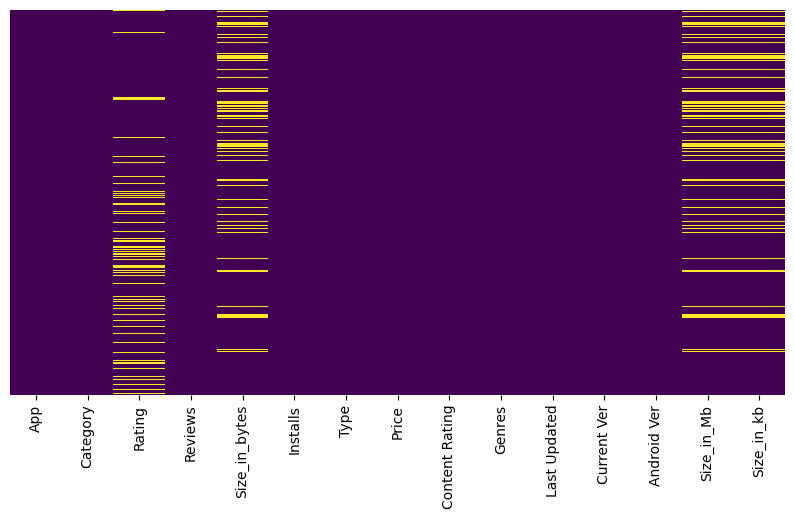

In [46]:
# plot missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Percentage of missing values in each column')

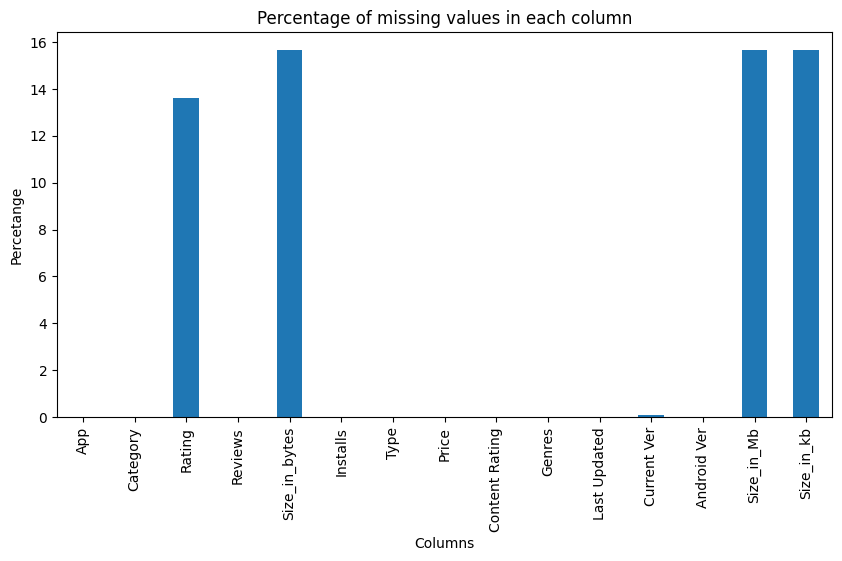

In [48]:
#make figure size
plt.figure(figsize=(10, 5))
# plot the null values by their percentage in each columns
miss_per=df.isnull().sum()/len(df)*100
miss_per.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percetange')
plt.title('Percentage of missing values in each column')



<Axes: >

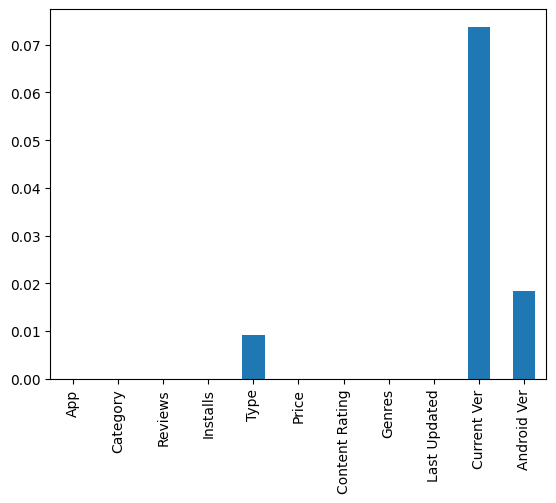

In [49]:
miss_per[miss_per<1].plot(kind='bar')